## 1.Chest X-rays(indiana university) 분석하기
## 1-1. projection파일과 reports 파일을 이용하여 분석해보았습니다

In [1]:
import pandas as pd

# Load the uploaded CSV files
file_path_projections = "C:/Users/user/Desktop/학부 연구생/프로젝트/archive/indiana_projections.csv"
file_path_reports ="C:/Users/user/Desktop/학부 연구생/프로젝트/archive/indiana_reports.csv"
# Read the CSV files
projections_df = pd.read_csv(file_path_projections)
reports_df = pd.read_csv(file_path_reports)

### 두개의 데이터 프레임을 하나의 데이터 프레임(merge_df)로 합침(uid항목을 공통항목으로)

In [2]:
# Merge the datasets on 'uid'
merged_df = pd.merge(projections_df, reports_df, on='uid')
merged_df

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,2,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
4,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
...,...,...,...,...,...,...,...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
7462,3998,3998_IM-2048-1001.dcm.png,Frontal,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.
7463,3998,3998_IM-2048-1002.dcm.png,Lateral,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.
7464,3999,3999_IM-2049-1001.dcm.png,Frontal,normal,normal,"CHEST PA and LATERAL: on XXXX, XXXX.",This is a XXXX-year-old female patient with sh...,"Chest x-XXXX, XXXX, XXXX.",NaN,The cardiac silhouette is normal in size and c...


-----------------------------------------------------------------------------------------------------------
## 1-2. 각 항목(column)의데이터 유형별 주요 통계
#### 카테고리형 데이터의 분포와 결측치를 포함한 데이터 품질을 확인

In [3]:
# Analyze each column in the merged dataset

def analyze_column(df):
    column_analysis = {}
    for column in df.columns:
        col_data = df[column]
        if col_data.dtype == 'object':
            # Categorical data analysis
            column_analysis[column] = {
                'Type': 'Categorical',
                'Unique Values': col_data.nunique(),
                'Most Common': col_data.value_counts().head(1).to_dict(),
                'Missing Values': col_data.isnull().sum(),
            }
        else:
            # Numerical data analysis
            column_analysis[column] = {
                'Type': 'Numerical',
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Standard Deviation': col_data.std(),
                'Missing Values': col_data.isnull().sum(),
            }
    return column_analysis

# Perform analysis on the merged DataFrame
column_analysis_results = analyze_column(merged_df)
column_analysis_results


{'uid': {'Type': 'Numerical',
  'Mean': 2002.8941869809805,
  'Median': 1999.0,
  'Standard Deviation': 1159.488366416998,
  'Missing Values': 0},
 'filename': {'Type': 'Categorical',
  'Unique Values': 7466,
  'Most Common': {'1_IM-0001-4001.dcm.png': 1},
  'Missing Values': 0},
 'projection': {'Type': 'Categorical',
  'Unique Values': 2,
  'Most Common': {'Frontal': 3818},
  'Missing Values': 0},
 'MeSH': {'Type': 'Categorical',
  'Unique Values': 1900,
  'Most Common': {'normal': 2695},
  'Missing Values': 0},
 'Problems': {'Type': 'Categorical',
  'Unique Values': 1432,
  'Most Common': {'normal': 2695},
  'Missing Values': 0},
 'image': {'Type': 'Categorical',
  'Unique Values': 697,
  'Most Common': {'Xray Chest PA and Lateral': 2363},
  'Missing Values': 0},
 'indication': {'Type': 'Categorical',
  'Unique Values': 2454,
  'Most Common': {'Chest pain': 253},
  'Missing Values': 159},
 'comparison': {'Type': 'Categorical',
  'Unique Values': 393,
  'Most Common': {'None.': 1589},

# 분석결과:


### 1.uid (Numerical)
#### -유형: 숫자형
#### -평균: 2002.89
#### -중앙값: 1999.0 (중앙값이 평균보다 약간 낮아 데이터가 약간 오른쪽으로 치우친 경향)
#### -표준편차: 1159.49 (데이터가 크게 분산됨)
#### -결측값: 없음
### 2. filename (Categorical)
#### 유형: 범주형
#### -고유 값 개수: 7466 (각 파일 이름은 고유)
#### -가장 빈도가 높은 값: '1_IM-0001-4001.dcm.png' (1회 나타남)
#### -결측값: 없음
### 3. projection (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 2 (Frontal, Lateral)
#### -가장 빈도가 높은 값: 'Frontal' (3818회 나타남)
#### -결측값: 없음
### 4. MeSH (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 1900
#### -가장 빈도가 높은 값: 'normal' (2695회 나타남)
#### -결측값: 없음
### 5. Problems (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 1432
#### -가장 빈도가 높은 값: 'normal' (2695회 나타남)
#### -결측값: 없음
### 6. image (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 697
#### -가장 빈도가 높은 값: 'Xray Chest PA and Lateral' (2363회 나타남)
#### -결측값: 없음
### 7. indication (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 2454
#### -가장 빈도가 높은 값: 'Chest pain' (253회 나타남)
#### -결측값: 159
### 8. comparison (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 393
#### -가장 빈도가 높은 값: 'None.' (1589회 나타남)
#### -결측값: 2260 (많은 결측값이 존재)
### 9. findings (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 2553
#### -가장 빈도가 높은 값: 'The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.' (98회 나타남)
#### -결측값: 997
### 10. impression (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 1770
#### -가장 빈도가 높은 값: 'No acute cardiopulmonary abnormality.' (585회 나타남)
#### -결측값: 52

## 분석 결과:
#### 1. 두개의 df를 uid를 공통 항목으로 묶어 merged_df로 만듬. 그리고 frontal과 lateral를 가지고 이용할 예정.
#### 2. 데이터 표본 수를 쌓을 땐, problem,impression 항목을 선택함.(findings와 comparison은 결측값이 많아서 제외,나머지는 중요 내용이 아니어서 제외)


--------------------------------------------------------------------------------------------
## 1-3. 
####      - Frontal(앞면)과 Lateral(옆면)의 분포, 주요 진단(Problems)별 빈도를 통계를 냄
####      - Frontal(앞면)과 Lateral(옆면) 이미지에서 발견된 문제의 차이점을 분석함

In [4]:
# Merge the datasets on 'uid'
merged_df = pd.merge(projections_df, reports_df, on='uid')

# Summary statistics for projection types
projection_counts = merged_df['projection'].value_counts()

# Analyze the frequency of different problems in 'Problems' column
problems_counts = merged_df['Problems'].str.split(';').explode().value_counts()

# Compare Problems by projection type
problems_by_projection = merged_df.groupby('projection')['Problems'].apply(
    lambda x: x.str.split(';').explode().value_counts()
)

projection_counts, problems_counts.head(), problems_by_projection


(projection
 Frontal    3818
 Lateral    3648
 Name: count, dtype: int64,
 Problems
 normal                   2695
 Lung                     1083
 Opacity                   988
 Cardiomegaly              655
 Pulmonary Atelectasis     645
 Name: count, dtype: int64,
 projection                       
 Frontal     normal                   1387
             Lung                      545
             Opacity                   501
             Calcinosis                332
             Cardiomegaly              331
                                      ... 
 Lateral     Thoracic vertebrae          1
             Bronchitis                  1
             Trachea, Carina             1
             Colonic Interposition       1
             Hemothorax                  1
 Name: Problems, Length: 239, dtype: int64)

### problems_by_projection(막대그래프)

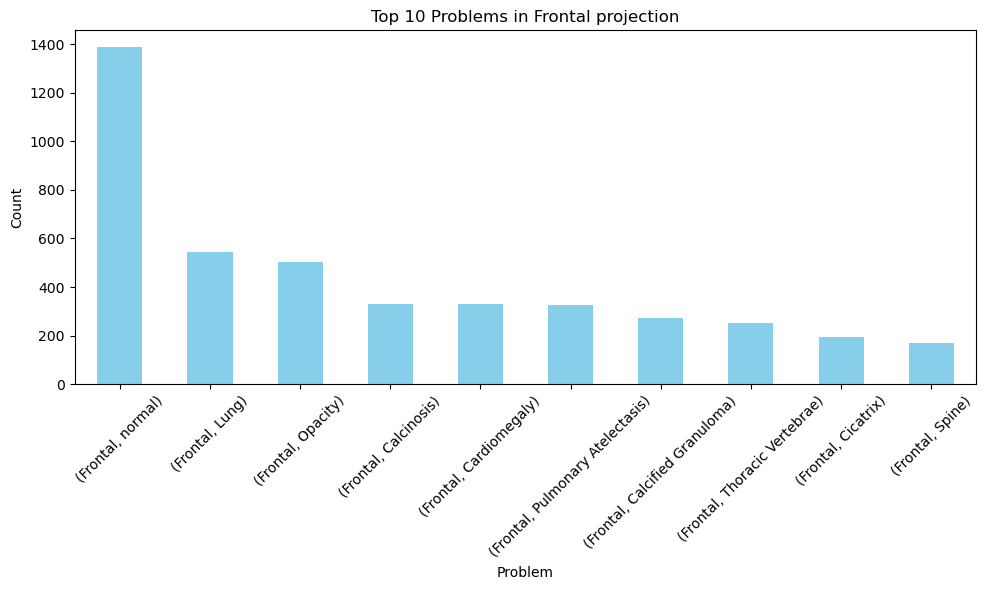

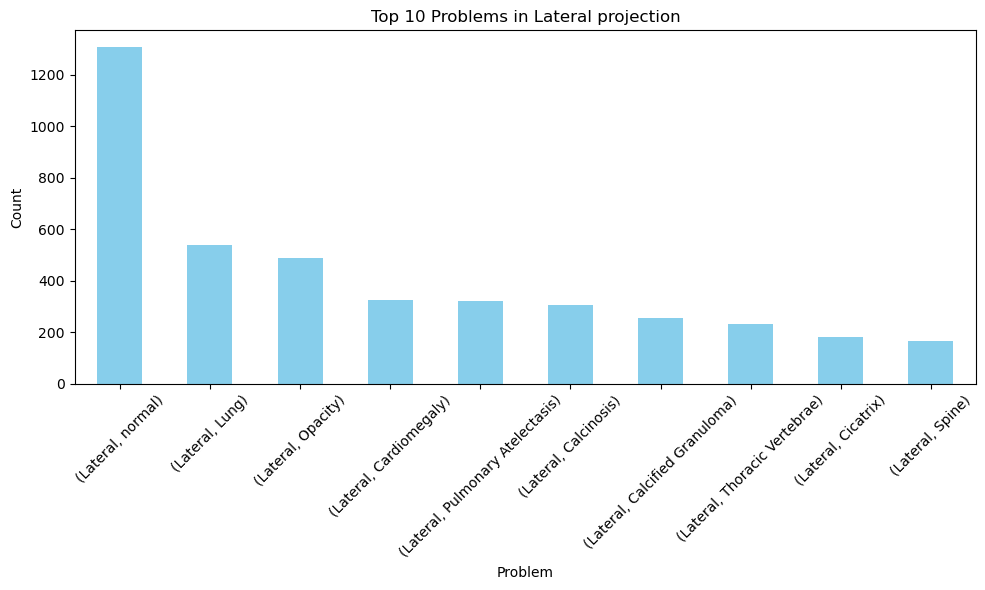

In [5]:
import matplotlib.pyplot as plt

# 'merged_df'가 이미 정의되어 있다고 가정합니다.
# 'problems_by_projection'을 생성하는 코드
problems_by_projection = merged_df.groupby('projection')['Problems'].apply(
    lambda x: x.str.split(';').explode().value_counts()
)

# 각 projection별로 top 10 문제만 추출하고 그래프 그리기
for projection, problem_counts in problems_by_projection.groupby(level=0):
    top_10 = problem_counts.head(10)  # 상위 10개 문제만 선택
    plt.figure(figsize=(10, 6))
    top_10.plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Problems in {projection} projection")
    plt.xlabel('Problem')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


--------------------------------------------------
# 분석결과:

## 투영 방식별 분포:

#### 앞면 이미지: 3818개
#### 옆면 이미지: 3648개<br>

## 주요 문제(Problems):
#### normal(정상): 2695건
#### Lung(폐): 1083건
#### Opacity(불투명도): 988건
#### Cardiomegaly(심비대): 655건
#### Pulmonary Atelectasis(폐기종): 645건<br>

## 방식에 따른 문제 분포:
#### 앞면 이미지에서는 정상, 폐, 불투명도가 주요 문제
#### 옆면 이미지에서는 앞면 이미지와 같은 분포를 이룸. 그러나 주요 문제에서는 적은 분포를 이룸.
#### thoracic vertebare(흉추),bronchitis(기관지염),trachea(기관)와 carina(기관 분기),colonic interposition(결장 이식),hemothorax(혈흉)등이 1건<br>

## 결론 
#### 앞면: 일반적인 폐 및 심장 질환을 관찰하고 진단하는 데 유용.
#### 옆면: 보완적인 정보를 제공하며, 앞면에서 관찰하기 어려운 특수 문제(척추, 기관지 등)를 확인.

-----------------------------------------------------------------------------------------------------------

## 1-4.문제 상관관계 분석 및 최종 진단(Impression) 빈도 분석 및 시각화

## 문제 상관관계 분석:
#### problems에 있는 유형 중 많이 발견된 10개를 가지고 상관관계를 분석해보았습니다.
#### 이들을 분석하여 묶어서 횟수를 계산함.
#### 이를 토대로 상관관계 계수로 나타내어 상관관계를 시각화.

In [6]:
# Filter and prepare data
top_problems = problems_counts.head(10).index
filtered_df = merged_df[merged_df['Problems'].notnull()]
filtered_df['Problems_list'] = filtered_df['Problems'].str.split(';')

# Extract Frontal and Lateral counts for top problems
problem_projection_counts = filtered_df.explode('Problems_list').query(
    "Problems_list in @top_problems"
).groupby(['projection', 'Problems_list']).size().unstack(fill_value=0)

C:\Users\user\AppData\Local\Temp\ipykernel_1936\669259210.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_co_occurrence_df['Count'], y=top_co_occurrence_df['Pair'].astype(str), palette='viridis')


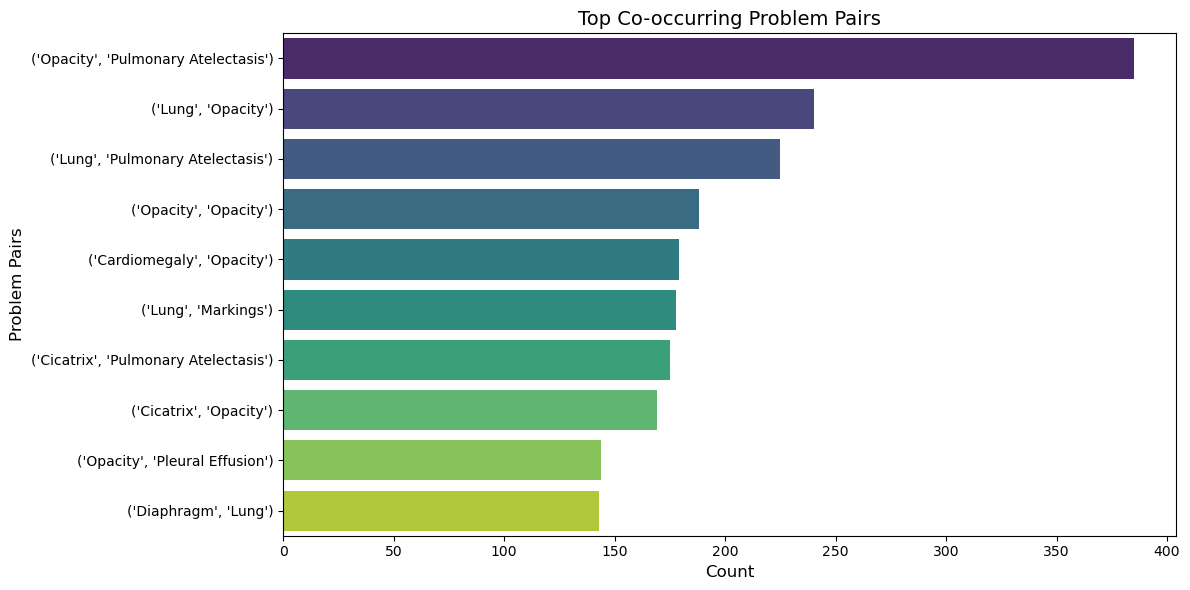

In [7]:
# Co-occurrence analysis of problems
from itertools import combinations
from collections import Counter
import seaborn as sns

# Count co-occurrence of problems
co_occurrence = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 2)
)

# Convert to DataFrame for visualization
co_occurrence_df = pd.DataFrame(co_occurrence.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

# Top co-occurring pairs
top_co_occurrence_df = co_occurrence_df.head(10)

# Plot co-occurrence
plt.figure(figsize=(12, 6))
sns.barplot(x=top_co_occurrence_df['Count'], y=top_co_occurrence_df['Pair'].astype(str), palette='viridis')
plt.title('Top Co-occurring Problem Pairs', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Pairs', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1936\1570152817.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


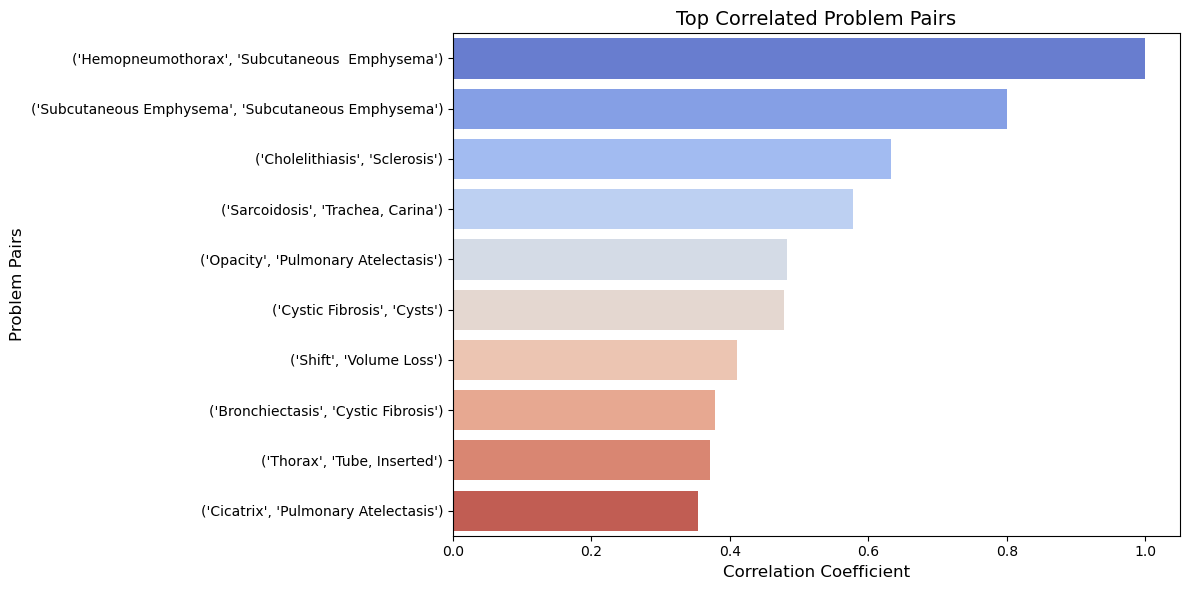

In [8]:
from itertools import combinations
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 문제 쌍 동시 발생 횟수 및 개별 발생 횟수 계산
pair_counts = defaultdict(int)
problem_counts = defaultdict(int)

for problems in filtered_df['Problems_list']:
    for problem in problems:
        problem_counts[problem] += 1
    for comb in combinations(sorted(problems), 2):
        pair_counts[comb] += 1

# 상관계수 계산
correlation_data = []
for (problem_a, problem_b), pair_count in pair_counts.items():
    count_a = problem_counts[problem_a]
    count_b = problem_counts[problem_b]
    correlation = pair_count / ((count_a * count_b) ** 0.5)  # 상관계수 공식
    correlation_data.append({'Pair': (problem_a, problem_b), 'Correlation': correlation})

# 데이터프레임으로 변환 및 정렬
correlation_df = pd.DataFrame(correlation_data).sort_values(by='Correlation', ascending=False)

# 상위 상관계수 문제 쌍 선택
top_correlation_df = correlation_df.head(10)

# 상관계수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_correlation_df['Correlation'], 
    y=top_correlation_df['Pair'].astype(str), 
    palette='coolwarm'
)
plt.title('Top Correlated Problem Pairs', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Problem Pairs', fontsize=12)
plt.tight_layout()
plt.show()


#### - 3개 이상의 상관관계 분석

C:\Users\user\AppData\Local\Temp\ipykernel_1936\3211856002.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


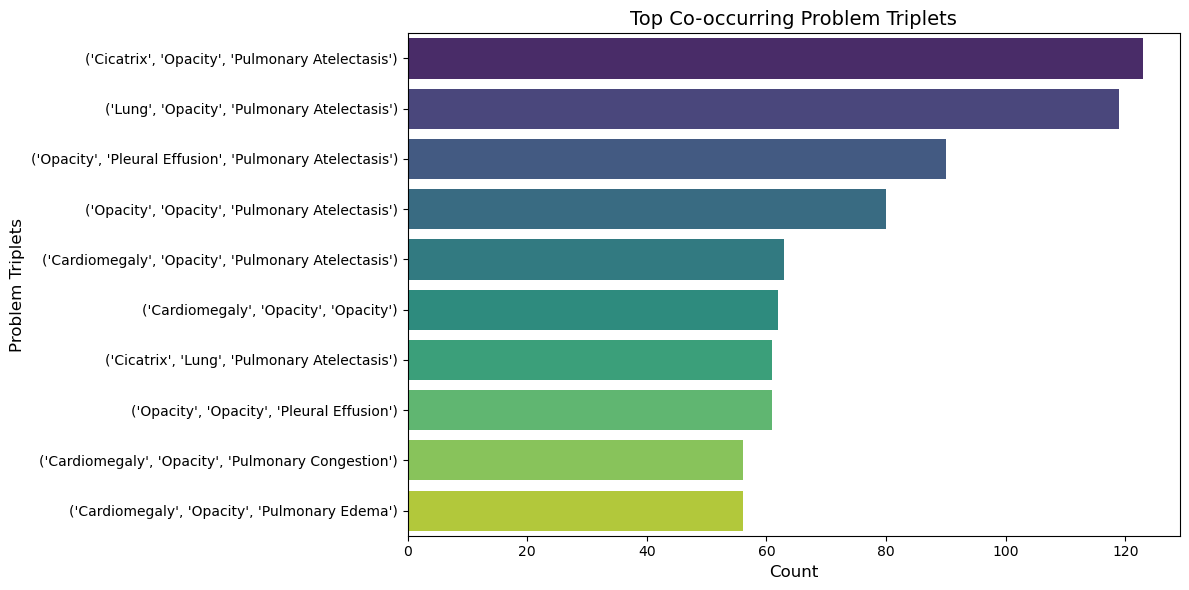

C:\Users\user\AppData\Local\Temp\ipykernel_1936\3211856002.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


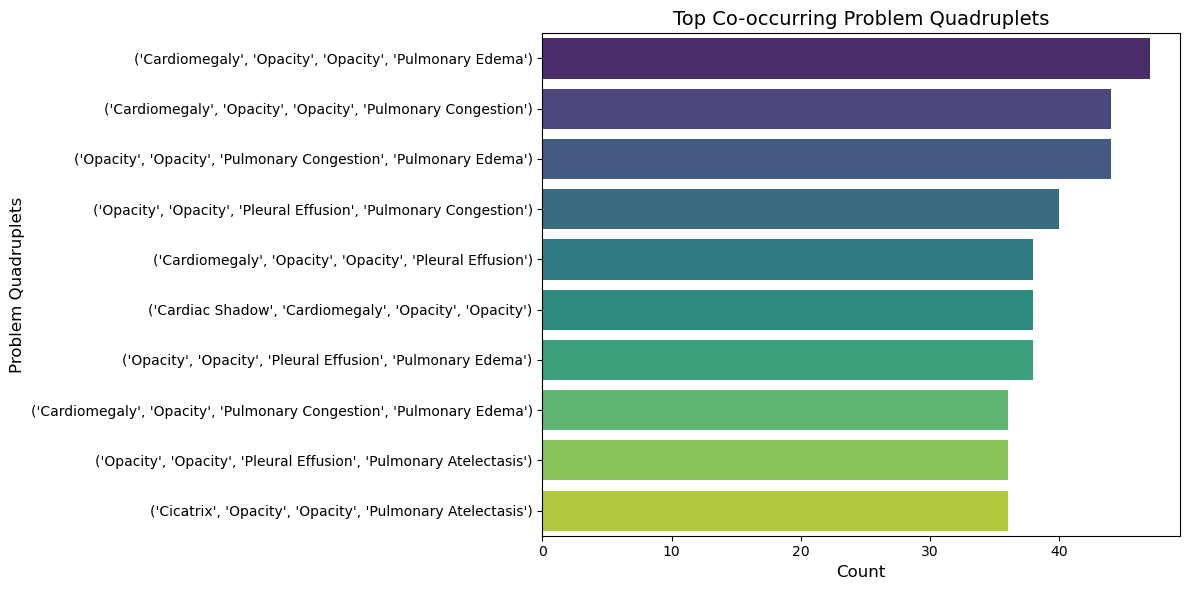

C:\Users\user\AppData\Local\Temp\ipykernel_1936\3211856002.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


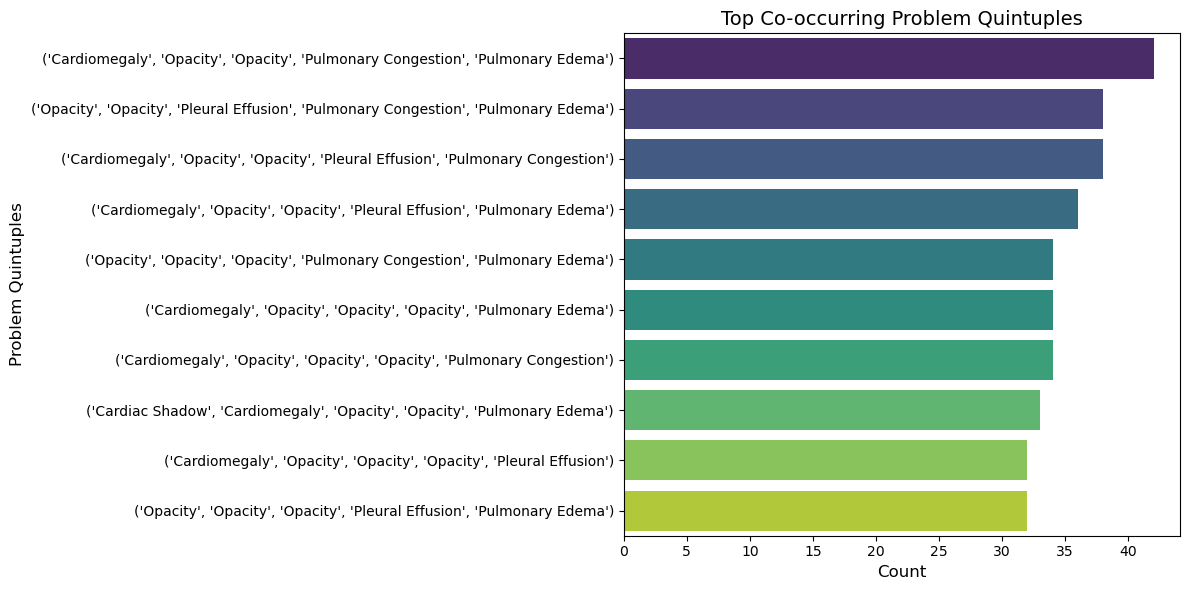

In [9]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count co-occurrence of problems (triplets)
co_occurrence_triplets = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 3)
)

# Convert to DataFrame for visualization
co_occurrence_triplets_df = pd.DataFrame(
    co_occurrence_triplets.items(), columns=['Triplet', 'Count']
).sort_values(by='Count', ascending=False)

# Top co-occurring triplets
top_co_occurrence_triplets_df = co_occurrence_triplets_df.head(10)

# Plot co-occurrence (triplets)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_co_occurrence_triplets_df['Count'],
    y=top_co_occurrence_triplets_df['Triplet'].astype(str),
    palette='viridis'
)
plt.title('Top Co-occurring Problem Triplets', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Triplets', fontsize=12)
plt.tight_layout()
plt.show()


from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count co-occurrence of problems (quadruplets)
co_occurrence_quadruplets = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 4)
)

# Convert to DataFrame for visualization
co_occurrence_quadruplets_df = pd.DataFrame(
    co_occurrence_quadruplets.items(), columns=['Quadruplet', 'Count']
).sort_values(by='Count', ascending=False)

# Top co-occurring quadruplets
top_co_occurrence_quadruplets_df = co_occurrence_quadruplets_df.head(10)

# Plot co-occurrence (quadruplets)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_co_occurrence_quadruplets_df['Count'],
    y=top_co_occurrence_quadruplets_df['Quadruplet'].astype(str),
    palette='viridis'
)
plt.title('Top Co-occurring Problem Quadruplets', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Quadruplets', fontsize=12)
plt.tight_layout()
plt.show()


from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count co-occurrence of problems (quintuples)
co_occurrence_quintuples = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 5)
)

# Convert to DataFrame for visualization
co_occurrence_quintuples_df = pd.DataFrame(
    co_occurrence_quintuples.items(), columns=['Quintuple', 'Count']
).sort_values(by='Count', ascending=False)

# Top co-occurring quintuples
top_co_occurrence_quintuples_df = co_occurrence_quintuples_df.head(10)

# Plot co-occurrence (quintuples)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_co_occurrence_quintuples_df['Count'],
    y=top_co_occurrence_quintuples_df['Quintuple'].astype(str),
    palette='viridis'
)
plt.title('Top Co-occurring Problem Quintuples', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Quintuples', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_1936\4175683757.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


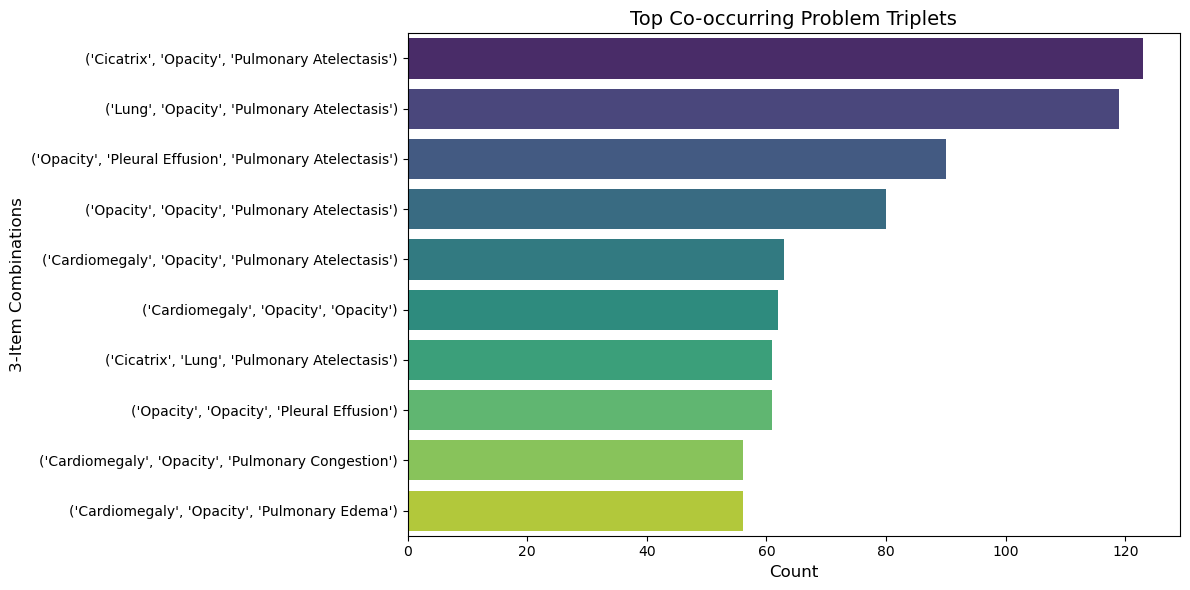

C:\Users\user\AppData\Local\Temp\ipykernel_1936\4175683757.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


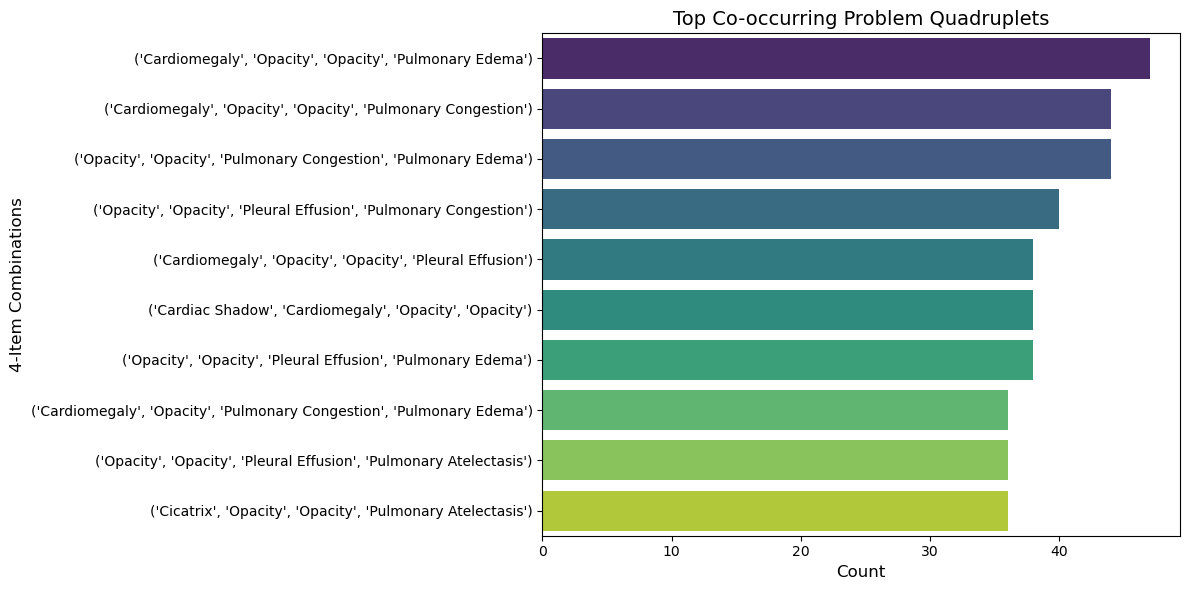

C:\Users\user\AppData\Local\Temp\ipykernel_1936\4175683757.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


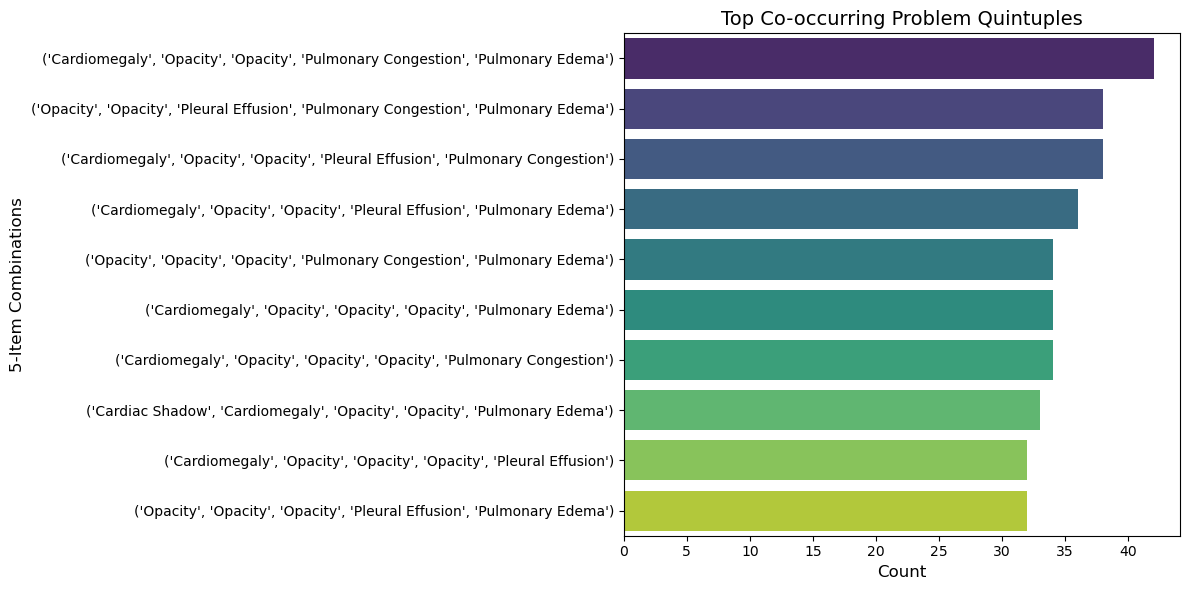

In [12]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count co-occurrences and plot results
def plot_top_co_occurrences(problems_list, group_size, top_n=10, title=""):
    # Count co-occurrences
    co_occurrences = Counter(
        comb
        for problems in problems_list
        for comb in combinations(sorted(problems), group_size)
    )
    
    # Convert to DataFrame
    co_occurrence_df = pd.DataFrame(
        co_occurrences.items(), columns=['Combination', 'Count']
    ).sort_values(by='Count', ascending=False)
    
    # Get top N co-occurrences
    top_co_occurrence_df = co_occurrence_df.head(top_n)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_co_occurrence_df['Count'],
        y=top_co_occurrence_df['Combination'].astype(str),
        palette='viridis'
    )
    plt.title(title, fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(f'{group_size}-Item Combinations', fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
plot_top_co_occurrences(
    filtered_df['Problems_list'], 
    group_size=3, 
    title="Top Co-occurring Problem Triplets"
)

plot_top_co_occurrences(
    filtered_df['Problems_list'], 
    group_size=4, 
    title="Top Co-occurring Problem Quadruplets"
)

plot_top_co_occurrences(
    filtered_df['Problems_list'], 
    group_size=5, 
    title="Top Co-occurring Problem Quintuples"
)


C:\Users\user\AppData\Local\Temp\ipykernel_1936\411026616.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


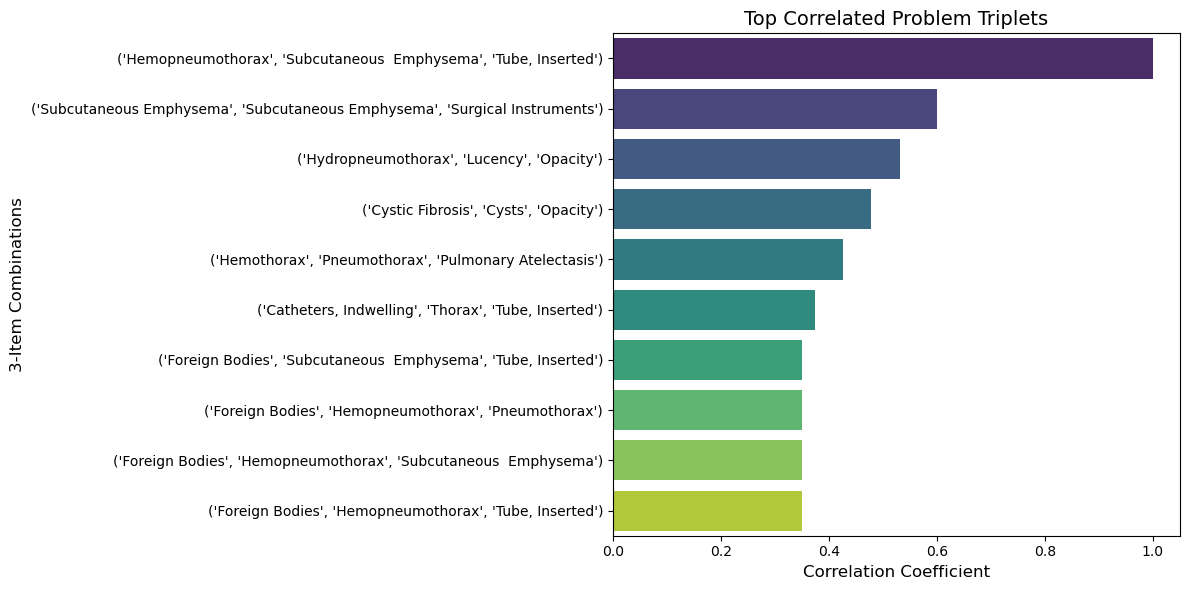

C:\Users\user\AppData\Local\Temp\ipykernel_1936\411026616.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


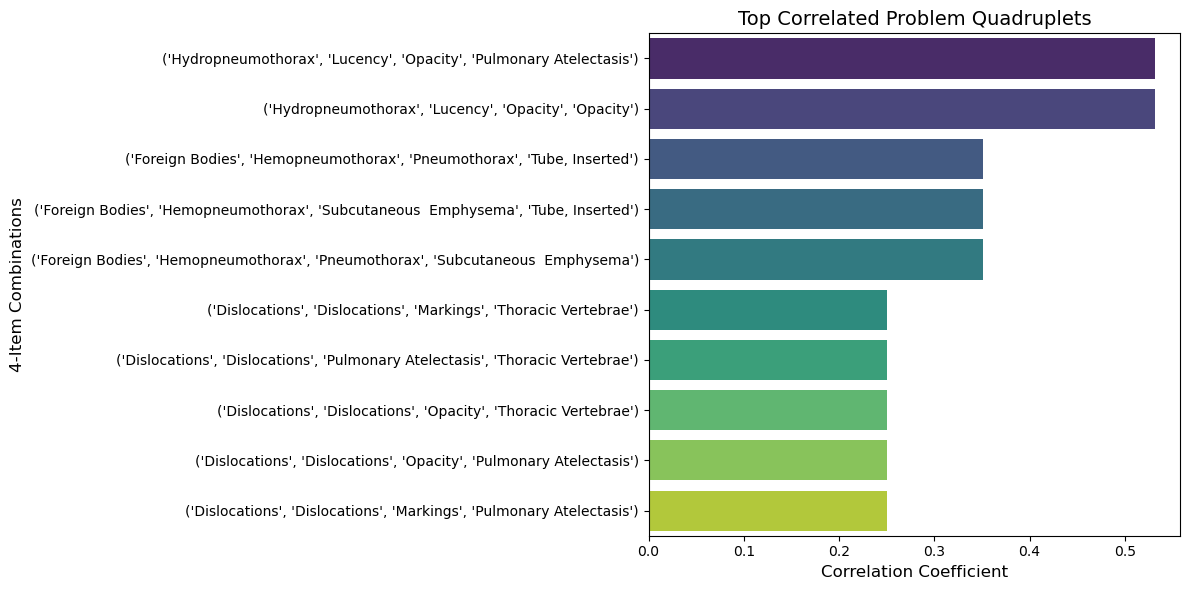

C:\Users\user\AppData\Local\Temp\ipykernel_1936\411026616.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


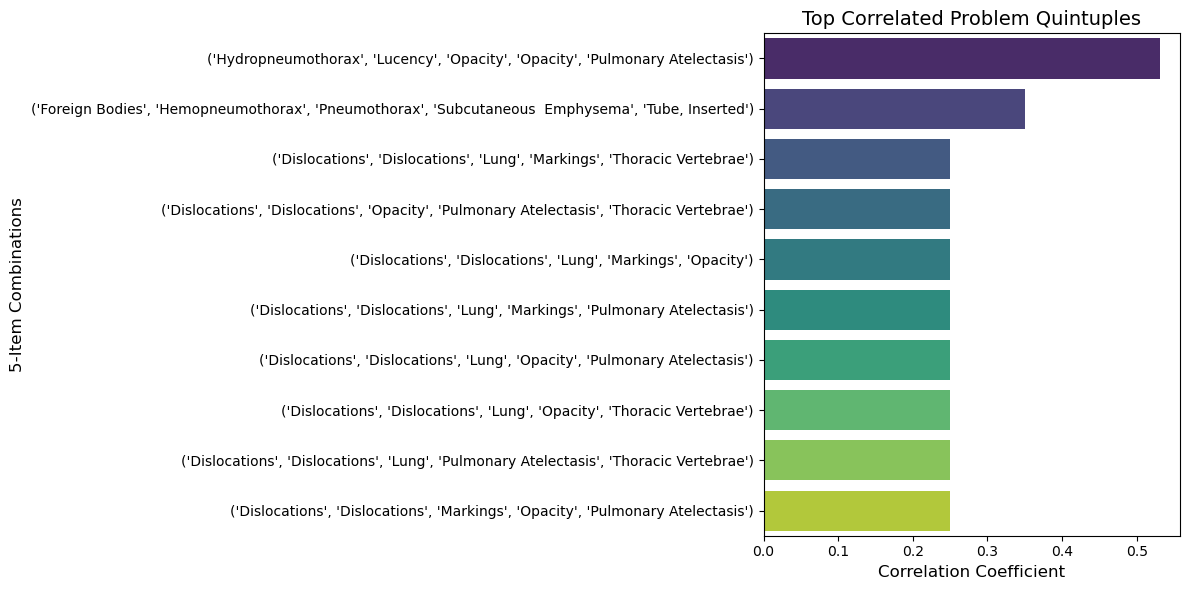

In [13]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count co-occurrences, calculate correlation, and plot results
def plot_top_co_occurrences_with_correlation(problems_list, group_size, top_n=10, title=""):
    # Count co-occurrences
    co_occurrences = Counter(
        comb
        for problems in problems_list
        for comb in combinations(sorted(problems), group_size)
    )
    
    # Count individual occurrences
    problem_counts = Counter(problem for problems in problems_list for problem in problems)
    
    # Calculate correlation for each combination
    correlation_data = []
    for combination, count in co_occurrences.items():
        correlation = count / (problem_counts[combination[0]] * problem_counts[combination[1]]) ** 0.5
        correlation_data.append({
            'Combination': combination,
            'Count': count,
            'Correlation': correlation
        })
    
    # Convert to DataFrame
    co_occurrence_df = pd.DataFrame(correlation_data).sort_values(by='Correlation', ascending=False)
    
    # Get top N co-occurrences
    top_co_occurrence_df = co_occurrence_df.head(top_n)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_co_occurrence_df['Correlation'],
        y=top_co_occurrence_df['Combination'].astype(str),
        palette='viridis'
    )
    plt.title(title, fontsize=14)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel(f'{group_size}-Item Combinations', fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
plot_top_co_occurrences_with_correlation(
    filtered_df['Problems_list'], 
    group_size=3, 
    title="Top Correlated Problem Triplets"
)

plot_top_co_occurrences_with_correlation(
    filtered_df['Problems_list'], 
    group_size=4, 
    title="Top Correlated Problem Quadruplets"
)

plot_top_co_occurrences_with_correlation(
    filtered_df['Problems_list'], 
    group_size=5, 
    title="Top Correlated Problem Quintuples"
)


#### 결론:최대 5개로 묶어서 상관관계 분석한 결과 두개로 묶었을때가 상관성을 명확히 보여주고 직관적인 것을 알 수 있습니다.

----
## 최종 진단(Impression) 빈도 분석 및 시각화:
#### 최종 진단의 상위 빈도를 시각화.

C:\Users\user\AppData\Local\Temp\ipykernel_1936\807389930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impression_counts.values, y=impression_counts.index, palette='mako')


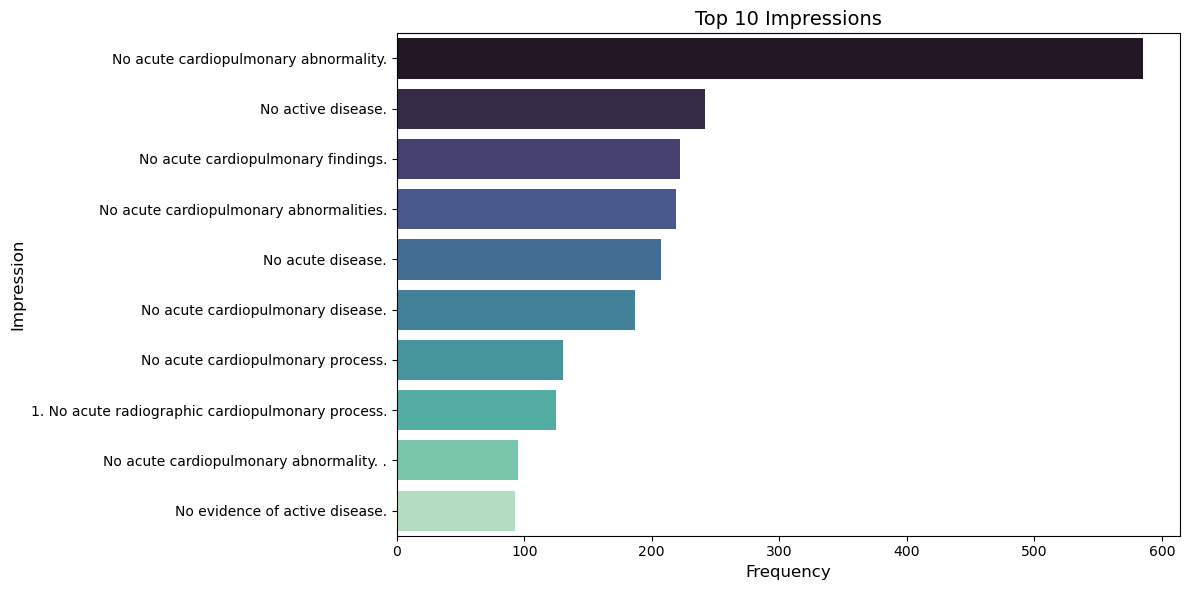

In [10]:

# Analyze top impressions
impression_counts = merged_df['impression'].value_counts().head(10)

# Plot impressions
plt.figure(figsize=(12, 6))
sns.barplot(x=impression_counts.values, y=impression_counts.index, palette='mako')
plt.title('Top 10 Impressions', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Impression', fontsize=12)
plt.tight_layout()
plt.show()

### impression 항목의 상관관계 분석한 결과
#### -> 표본이 40개이상인 항목은 mediastinal contour within normal limits.->no acute cardiplumonary banormality identified.
#### (종격동 윤곽은 정상 범위 내에 있습니다. -> 급성 심폐 이상은 확인되지 않았습니다.")<br>
#### 그래서 imprssion은 상관관계 분석에 적절치 않다.

-----------------------------------------------------------------------------------------------------------
# 분석결과:
## 투영 방식별 주요 문제 분포:
#### rontal과 Lateral 모두에서 공통적으로 많이 나타나는 문제는 normal(정상), Lung(폐), Opacity(불투명도) 등입니다.
#### 일부 문제는 특정 투영 방식에서 더 자주 나타나는 경향이 보입니다.

## 문제의 상관관계 분석:
#### 자주 함께 발견되는 문제 쌍의 상위 10개를 분석한 결과, 특정 문제들이 서로 연관되어 발생하는 경향이 있습니다.
#### 예: Lung(폐)과 Opacity(불투명도)의 빈도가 2번째로 높습니다.

## 최종 진단(Impression) 빈도:
#### 상위 10개의 진단 결과 중 대부분이 "정상"에 해당하거나 경미한 소견을 나타냅니다.
#### 이는 주로 "Normal chest x-ray"(정상)와 같은 진단이 빈번하다는 점을 보여줍니다.